In [1]:
import csv
import os
import pandas as pd
from textblob import TextBlob

# Function to analyze product sentiment
def analyze_product_sentiment(product, reviews):
    positive_count, negative_count, neutral_count = 0, 0, 0

    for review in reviews:
        text = review['review']
        if product.lower() in text.lower():
            sentiment = TextBlob(text).sentiment.polarity
            if sentiment > 0:
                positive_count += 1
            elif sentiment < 0:
                negative_count += 1
            else:
                neutral_count += 1

    return {
        'product': product,
        'positive_count': positive_count,
        'negative_count': negative_count,
        'neutral_count': neutral_count
    }

# Function to load reviews from CSV files and analyze product sentiment
def analyze_sentiment_branch_wise(products):
    sentiment_data = {}

    for file in os.listdir():
        if file.endswith("_reviews.csv"):
            branch_name = file[:-12]  # Remove '_reviews.csv' from the file name
            reviews_df = pd.read_csv(file)
            reviews = reviews_df.to_dict(orient='records')
            branch_sentiment_data = []

            for product in products:
                sentiment = analyze_product_sentiment(product, reviews)
                branch_sentiment_data.append(sentiment)

            sentiment_data[branch_name] = branch_sentiment_data

    return sentiment_data

# List of products
products = [
    'Chicken schnitzel on a roll', 'Chips', 'Wrap', 'Sweet potato chips',
    'Schnitzel Wraps', 'Spice of Life wrap', 'Plain and Simple',
    'Veg schnitzel', 'Grilled burger and wrap (chicken or beef)',
    'Pork Hawaiian schnitzel', 'Pork schnitzel with spice crumb',
    'Traditional schnitzel', 'Chicken Parma'
]

# Analyze sentiment for each product at each branch
sentiment_data = analyze_sentiment_branch_wise(products)

# # Print the results
# for branch, sentiment_results in sentiment_data.items():
#     print(f"Branch: {branch}")
#     for sentiment_result in sentiment_results:
#         product = sentiment_result['product']
#         pos = sentiment_result['positive_count']
#         neg = sentiment_result['negative_count']
#         neu = sentiment_result['neutral_count']
#         print(f"Product: {product}, Positive: {pos}, Negative: {neg}, Neutral: {neu}")
#     print("\n")


/tmp/ipykernel_53723/1663319615.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categories', y='rating', hue='branch', data=grouped_data, ci=None)


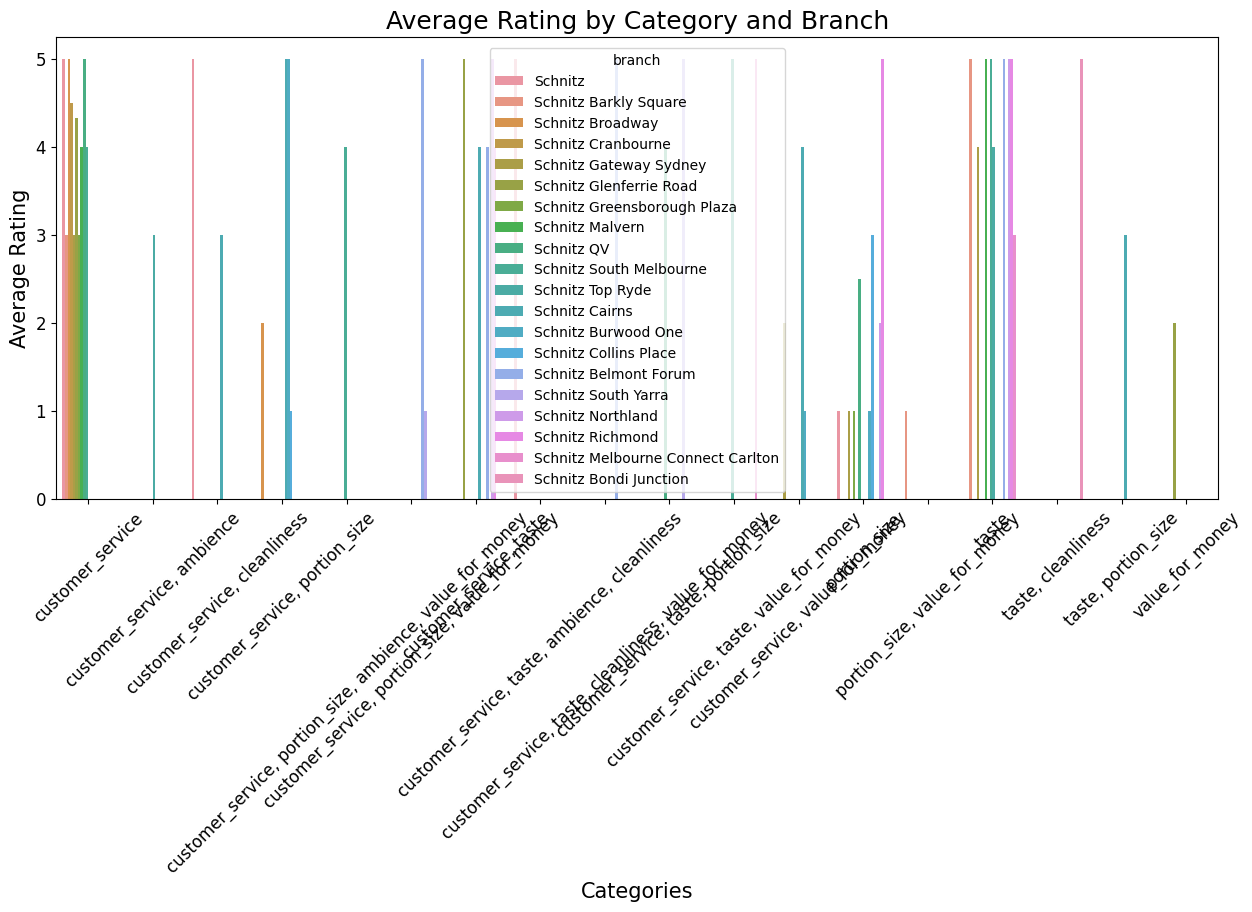

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(file_pattern):
    data = []

    for file in os.listdir():
        if file.endswith(file_pattern):
            branch_name = file[:-len(file_pattern)]  # Remove the file pattern from the file name
            df = pd.read_csv(file)
            df['branch'] = branch_name
            data.append(df)

    return pd.concat(data, ignore_index=True)

def analyze_data(data):
    grouped_data = data.groupby(['categories', 'branch']).agg({'rating': 'mean'}).reset_index()

    grouped_data['rating_rank'] = grouped_data.groupby('categories')['rating'].rank(ascending=False, method='dense')

    return grouped_data

def visualize_data(grouped_data):
    plt.figure(figsize=(15, 6))
    sns.barplot(x='categories', y='rating', hue='branch', data=grouped_data, ci=None)

    plt.title("Average Rating by Category and Branch", fontsize=18)
    plt.xlabel("Categories", fontsize=15)
    plt.ylabel("Average Rating", fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    # plt.legend(fontsize=12)

    plt.show()

data = load_data("_reviews.csv")
grouped_data = analyze_data(data)
visualize_data(grouped_data)


In [6]:
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio

def load_data(file_pattern):
    data = []

    for file in os.listdir():
        if file.endswith(file_pattern):
            branch_name = file[:-len(file_pattern)]  # Remove the file pattern from the file name
            df = pd.read_csv(file)
            df['branch'] = branch_name
            data.append(df)

    return pd.concat(data, ignore_index=True)

def analyze_data(data):
    data['categories'] = data['categories'].str.split(', ')
    data = data.explode('categories')
    grouped_data = data.groupby(['categories', 'branch']).agg({'rating': 'mean'}).reset_index()
    grouped_data['rating_rank'] = grouped_data.groupby('categories')['rating'].rank(ascending=False, method='dense')

    return grouped_data

data = load_data("_reviews.csv")
grouped_data = analyze_data(data)

from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

def visualize_data(grouped_data):
    branches = sorted(grouped_data['branch'].unique())
    categories = sorted(grouped_data['categories'].unique())
    
    palette = ['#5e4fa2', '#3288bd', '#66c2a5', '#abdda4', '#e6f598', '#ffffbf', '#fee08b', '#fdae61', '#f46d43', '#d53e4f', '#9e0142']

    source = ColumnDataSource(grouped_data)

    p = figure(x_range=categories, y_range=branches, plot_width=1000, plot_height=400,
               title="Average Rating by Category and Branch",
               toolbar_location=None, tools="")

    p.rect(x='categories', y='branch', width=0.9, height=0.9, source=source,
           line_color='white', fill_color=factor_cmap('categories', palette=palette, factors=categories))

    p.add_tools(HoverTool(tooltips=[("Rating", "@rating{1.1}")]))

    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Categories"
    p.yaxis.axis_label = "Branches"
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "10pt"
    p.axis.major_label_standoff = 0

    show(p)

visualize_data(grouped_data)
# fig = px.parallel_coordinates(grouped_data,
#                               color="rating",
#                               dimensions=["branch", "categories", "rating"],
#                               color_continuous_scale=px.colors.diverging.Tealrose,
#                               color_continuous_midpoint=grouped_data["rating"].mean())

# fig.update_layout(title="Average Ratings by Category and Branch",
#                   xaxis_title="Dimensions",
#                   yaxis_title="Values",
#                   legend_title="Ratings",
#                   font=dict(size=12))

# pio.write_html(fig, file="output.html", auto_open=True)


                  name                                            address  \
0  Schnitz South Yarra  Tenancy T15/299 Toorak Rd, South Yarra VIC 314...   
1  Schnitz South Yarra  Tenancy T15/299 Toorak Rd, South Yarra VIC 314...   
2  Schnitz South Yarra  Tenancy T15/299 Toorak Rd, South Yarra VIC 314...   
3  Schnitz South Yarra  Tenancy T15/299 Toorak Rd, South Yarra VIC 314...   
4  Schnitz South Yarra  Tenancy T15/299 Toorak Rd, South Yarra VIC 314...   

                                              review  rating        time  \
0  Canceled dinner plans results in Uber eats and...       4  1679652431   
1  Company wide the definition of vegetarian and ...       1  1673488575   
2  Finally it's great to have a Schnitz close by....       5  1543557588   
3  Reasonable burger with some good salad colours...       4  1675674550   
4  The staff are quite polite and friendly but th...       1  1680419832   

                                          categories               branch  
0   

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

In [5]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap

def visualize_data(grouped_data):
    branches = sorted(grouped_data['branch'].unique())
    categories = sorted(grouped_data['categories'].unique())
    
    palette = ['#5e4fa2', '#3288bd', '#66c2a5', '#abdda4', '#e6f598', '#ffffbf', '#fee08b', '#fdae61', '#f46d43', '#d53e4f', '#9e0142']

    source = ColumnDataSource(grouped_data)

    p = figure(x_range=categories, y_range=branches, plot_width=1000, plot_height=400,
               title="Average Rating by Category and Branch",
               toolbar_location=None, tools="")

    p.rect(x='categories', y='branch', width=0.9, height=0.9, source=source,
           line_color='white', fill_color=factor_cmap('categories', palette=palette, factors=categories))

    p.add_tools(HoverTool(tooltips=[("Rating", "@rating{1.1}")]))

    p.xaxis.major_label_orientation = 1
    p.xaxis.axis_label = "Categories"
    p.yaxis.axis_label = "Branches"
    p.grid.grid_line_color = None
    p.axis.axis_line_color = None
    p.axis.major_tick_line_color = None
    p.axis.major_label_text_font_size = "10pt"
    p.axis.major_label_standoff = 0

    show(p)

visualize_data(grouped_data)

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width